In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math


In [2]:
import warnings
warnings.filterwarnings('ignore')

https://app.powerbi.com/groups/me/reports/25dd013b-3b07-4f84-b096-b2db9335638c/ReportSection?ctid=5c98fb47-d3b9-4649-9d94-f88cbdd9729c

## AQI (Air Quality Index)

Determine the concentration of each pollutant: You need to know the concentration of PM2.5, NO, and O3 in the air. This information can be obtained from local air quality monitoring stations or online resources.

Convert the pollutant concentrations into their respective AQI categories: For each pollutant, use a conversion table that shows the corresponding AQI category based on its concentration. The US Environmental Protection Agency (EPA) provides such tables for PM2.5, NO, and O3 on its website.

Identify the highest AQI category: The AQI for a particular day is determined by the pollutant with the highest AQI category. For example, if PM2.5 has an AQI of 150 and NO has an AQI of 100, the AQI for that day will be 150.

Report the AQI and associated health effects: Once you have determined the AQI, you can report it along with the associated health effects. The EPA provides a table that shows the health effects for each AQI category.

# Greenhouse gases

Greenhouse gases are gases that trap heat in the Earth's atmosphere and contribute to the greenhouse effect, which is the warming of the Earth's surface. The most common greenhouse gases are:
<br>  Carbon dioxide (CO2)
<br>  Methane (CH4)
<br>  Nitrous oxide (N2O)
<br>  fluorinated gases (such as hydrofluorocarbons, perfluorocarbons, and sulfur hexafluoride).

These gases are released into the atmosphere through various human activities, including burning fossil fuels for energy, deforestation, agriculture, and industrial processes. The concentration of greenhouse gases in the atmosphere has been increasing since the Industrial Revolution, which has led to an increase in global temperatures and a variety of negative impacts, such as sea level rise, more frequent and severe heatwaves, and changes in precipitation patterns.

## <li> Loading  Air Quality data for years 2015, 2016, 2017 and 2018 for City of Edmonton:
## <li> EDA (Exploratory data analysis performed by each year)

### Combining Air quality data reading for city of Edmonton for year 2015, 2016, 2017 and 2018

In [3]:
df_2015=pd.read_csv("Edmonton_Area_Air_Quality_Readings__2015.csv")

In [4]:
df_2016 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2016.csv")

In [5]:
df_2017 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2017.csv")

In [6]:
df_2018 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2018.csv")

### <li> Combined data for weather and air Quality for each year:

In [7]:
joined_df_AQ1 = pd.concat([df_2015,df_2016])

In [8]:
joined_df_AQ2 = pd.concat([df_2017,df_2018])

In [9]:
joined_df_AQ=pd.concat([joined_df_AQ1,joined_df_AQ2])

In [10]:

joined_df_AQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407596 entries, 0 to 105175
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Row ID                   407596 non-null  object 
 1   Monitoring Station Name  407596 non-null  object 
 2   Parameter Measured       407596 non-null  object 
 3   Average Daily Value      407596 non-null  float64
 4   Unit of Measure          387811 non-null  object 
 5   Date Measured            407596 non-null  object 
 6   Latitude                 407596 non-null  float64
 7   Longitude                407596 non-null  float64
 8   Geo Location             407596 non-null  object 
dtypes: float64(3), object(6)
memory usage: 31.1+ MB


In [11]:
joined_df_AQ['Parameter Measured'].value_counts()

Outdoor Air Temperature            33563
Wind Direction                     32901
Wind Speed                         32844
Nitrogen Dioxide                   29636
Nitric Oxide                       29636
Total Oxides Of Nitrogen           29636
Sulphur Dioxide                    28320
PM2.5 Mass                         25206
Relative Humidity                  20513
Std. Dev. of Wind Direction        20311
Ozone                              20201
Air Quality Index                  19785
Total Hydrocarbons                 12366
Hydrogen Sulphide                  11319
Std. Dev. of Wind Speed            10824
Methane                             9243
Non-methane Hydrocarbons            9194
Carbon Monoxide                     6738
Ammonia                             3495
Ethylene                            2805
Delta Temperature                   2713
Photosynthetic Active Radiation     2486
Solar Radiation                     2450
Catch of Standard Collector         1446
o-Xylene        

In [12]:

joined_df_AQ = joined_df_AQ[joined_df_AQ['Monitoring Station Name'].isin({'Edmonton Central','Edmonton South', 'Edmonton East'})]

joined_df_AQ.sample(5)

,Row ID,Monitoring Station Name,Parameter Measured,Average Daily Value,Unit of Measure,Date Measured,Latitude,Longitude,Geo Location
28587,Edmonton South-2015-05-04-Wind Speed-11.7542,Edmonton South,Wind Speed,11.7542,km/hr 10m,"May 04, 2015",53.500139,-113.526056,POINT (-113.526056 53.500139)
51818,Edmonton Central-2017-06-27-Total Hydrocarbons...,Edmonton Central,Total Hydrocarbons,2.0000,ppm,"Jun 27, 2017",53.544453,-113.498842,POINT (-113.498842 53.544453)
66998,Edmonton South-2017-08-18-Relative Humidity-64...,Edmonton South,Relative Humidity,64.9167,percent,"Aug 18, 2017",53.500139,-113.526056,POINT (-113.526056 53.500139)
41176,Edmonton East-2016-06-05-Methane-1.8875,Edmonton East,Methane,1.8875,ppm,"Jun 05, 2016",53.548139,-113.368194,POINT (-113.368194 53.548139)
81465,Edmonton South-2016-10-23-Carbon Monoxide-0.3083,Edmonton South,Carbon Monoxide,0.3083,ppm,"Oct 23, 2016",53.500139,-113.526056,POINT (-113.526056 53.500139)


In [13]:
joined_df_AQ = joined_df_AQ.rename(columns={'Date Measured': 'Date/Time'})

In [14]:
joined_df_AQ['Date/Time'] = pd.to_datetime(joined_df_AQ['Date/Time'])

In [15]:
pivoted_df = joined_df_AQ.pivot_table(index='Date/Time', columns='Parameter Measured', values='Average Daily Value', aggfunc='mean')
pivoted_df.reset_index(inplace=True)
pivoted_df= pivoted_df.sort_values(by='Date/Time')
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date/Time                    1461 non-null   datetime64[ns]
 1   Air Quality Index            1461 non-null   float64       
 2   Carbon Monoxide              1461 non-null   float64       
 3   Hydrogen Sulphide            1448 non-null   float64       
 4   Methane                      1459 non-null   float64       
 5   Nitric Oxide                 1461 non-null   float64       
 6   Nitrogen Dioxide             1461 non-null   float64       
 7   Non-methane Hydrocarbons     1455 non-null   float64       
 8   Outdoor Air Temperature      1461 non-null   float64       
 9   Ozone                        1461 non-null   float64       
 10  PM10 Mass                    412 non-null    float64       
 11  PM2.5 Mass                   1461 non-null 

### <li> 'Pivoted_df'  is the final dataset for making model for predicting Air Quality in Edmonton:

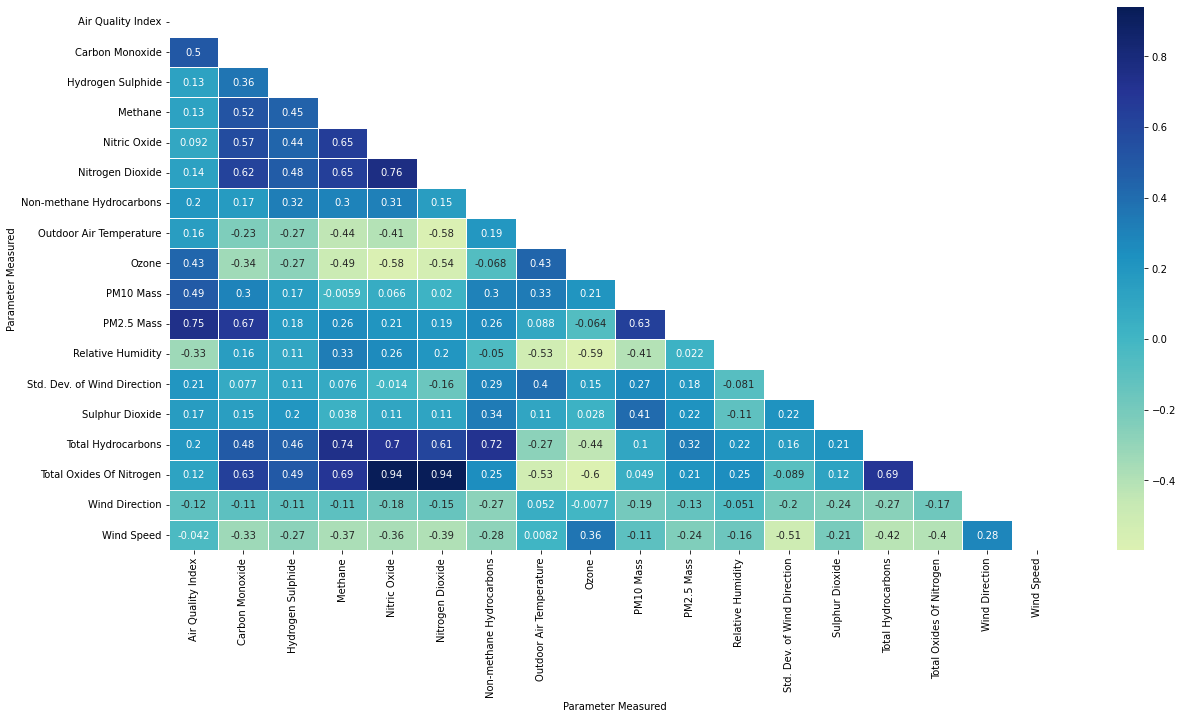

In [16]:
corr_matrix2 = pivoted_df.corr()
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))
sns.heatmap(corr_matrix2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

### <li> Above heatmap suggests that Air Quality index is mostly affected by PM2.5 in Edmonton.
### <li> Saved the final data set to new  excel file 'New_Data.xlsx'.

In [17]:
pivoted_df['Date/Time'] = pd.to_datetime(pivoted_df['Date/Time'])

In [18]:
pivoted_df.to_csv('Final_Data.csv', index=False)

In [19]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date/Time                    1461 non-null   datetime64[ns]
 1   Air Quality Index            1461 non-null   float64       
 2   Carbon Monoxide              1461 non-null   float64       
 3   Hydrogen Sulphide            1448 non-null   float64       
 4   Methane                      1459 non-null   float64       
 5   Nitric Oxide                 1461 non-null   float64       
 6   Nitrogen Dioxide             1461 non-null   float64       
 7   Non-methane Hydrocarbons     1455 non-null   float64       
 8   Outdoor Air Temperature      1461 non-null   float64       
 9   Ozone                        1461 non-null   float64       
 10  PM10 Mass                    412 non-null    float64       
 11  PM2.5 Mass                   1461 non-null 

In [20]:
new_df= pd.read_csv('Final_Data.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date/Time                    1461 non-null   object 
 1   Air Quality Index            1461 non-null   float64
 2   Carbon Monoxide              1461 non-null   float64
 3   Hydrogen Sulphide            1448 non-null   float64
 4   Methane                      1459 non-null   float64
 5   Nitric Oxide                 1461 non-null   float64
 6   Nitrogen Dioxide             1461 non-null   float64
 7   Non-methane Hydrocarbons     1455 non-null   float64
 8   Outdoor Air Temperature      1461 non-null   float64
 9   Ozone                        1461 non-null   float64
 10  PM10 Mass                    412 non-null    float64
 11  PM2.5 Mass                   1461 non-null   float64
 12  Relative Humidity            1452 non-null   float64
 13  Std. Dev. of Wind 

In [21]:
pivoted_df.head(2)

Parameter Measured,Date/Time,Air Quality Index,Carbon Monoxide,Hydrogen Sulphide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Sulphur Dioxide,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
0,2015-01-01,2.405967,0.197200,0.0001,1.9479,0.0022,0.007067,0.06665,2.8167,0.0279,1.0000,2.277767,75.8750,13.79165,0.00120,2.052767,0.009267,220.33335,11.9250
1,2015-01-02,2.308133,0.205567,0.0005,2.0104,0.0114,0.017633,0.09585,-16.1375,0.0186,3.0435,6.213633,80.7083,16.14585,0.00185,2.176400,0.029033,131.31250,10.1146


In [22]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_squared_percentage_error, mean_squared_error
from sktime.utils.plotting import plot_series
from sktime.registry import all_estimators
from sktime.datasets import load_airline
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter
#from sktime.transformations.series.compose import OptionalPassthrough
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.fbprophet import Prophet
import sktime
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

In [23]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date/Time                    1461 non-null   datetime64[ns]
 1   Air Quality Index            1461 non-null   float64       
 2   Carbon Monoxide              1461 non-null   float64       
 3   Hydrogen Sulphide            1448 non-null   float64       
 4   Methane                      1459 non-null   float64       
 5   Nitric Oxide                 1461 non-null   float64       
 6   Nitrogen Dioxide             1461 non-null   float64       
 7   Non-methane Hydrocarbons     1455 non-null   float64       
 8   Outdoor Air Temperature      1461 non-null   float64       
 9   Ozone                        1461 non-null   float64       
 10  PM10 Mass                    412 non-null    float64       
 11  PM2.5 Mass                   1461 non-null 

parameter: Date/Time,Air Quality Index,Carbon Monoxide ,Methane,Nitric Oxide,Nitrogen Dioxide,Outdoor Air Temperature,Ozone, PM10 Mass, PM2.5 Mass, Relative humidity, relative himidity, sulphur dioxide, wind direction

### Monte Carlo simulation<br>
Monte Carlo simulation is used to fill missing values in data. Monte Carlo simulation is a computational technique that uses random sampling to simulate various possible outcomes of a system or process. In the context of filling missing data, Monte Carlo simulation involves generating random values for the missing data points based on the statistical properties of the existing data.

In [24]:
# Fill missing values with Monte Carlo simulation
for col in pivoted_df.columns:
    if pivoted_df[col].isnull().sum() > 0:
        mean = pivoted_df[col].mean()
        std = pivoted_df[col].std()
        null_count = pivoted_df[col].isnull().sum()
        fill_values = np.random.normal(loc=mean, scale=std, size=null_count)
        pivoted_df.loc[pivoted_df[col].isnull(), col] = fill_values

In [25]:
pivoted_df['Date/Time'] = pd.to_datetime(pivoted_df['Date/Time'])

In [26]:
pivoted_df['Date/Time'].head()

0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: Date/Time, dtype: datetime64[ns]

In [27]:
pivoted_df['Date/Time'].tail()

1456   2018-12-27
1457   2018-12-28
1458   2018-12-29
1459   2018-12-30
1460   2018-12-31
Name: Date/Time, dtype: datetime64[ns]

In [28]:
pivoted_df['Date/Time'].tail(15)

1446   2018-12-17
1447   2018-12-18
1448   2018-12-19
1449   2018-12-20
1450   2018-12-21
1451   2018-12-22
1452   2018-12-23
1453   2018-12-24
1454   2018-12-25
1455   2018-12-26
1456   2018-12-27
1457   2018-12-28
1458   2018-12-29
1459   2018-12-30
1460   2018-12-31
Name: Date/Time, dtype: datetime64[ns]

In [29]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date/Time                    1461 non-null   datetime64[ns]
 1   Air Quality Index            1461 non-null   float64       
 2   Carbon Monoxide              1461 non-null   float64       
 3   Hydrogen Sulphide            1461 non-null   float64       
 4   Methane                      1461 non-null   float64       
 5   Nitric Oxide                 1461 non-null   float64       
 6   Nitrogen Dioxide             1461 non-null   float64       
 7   Non-methane Hydrocarbons     1461 non-null   float64       
 8   Outdoor Air Temperature      1461 non-null   float64       
 9   Ozone                        1461 non-null   float64       
 10  PM10 Mass                    1461 non-null   float64       
 11  PM2.5 Mass                   1461 non-null 

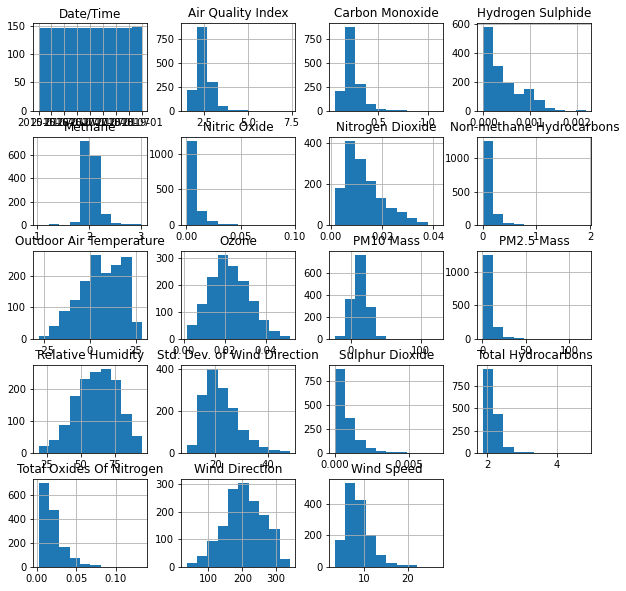

In [30]:
pivoted_df.hist(figsize=(10,10))
plt.show()

In [31]:
# Convert the 'date' column to a datetime object and set it as the index
pivoted_df['Date/Time'] = pd.to_datetime(pivoted_df['Date/Time'])
pivoted_df.set_index('Date/Time', inplace=True)

In [32]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
pdf=pivoted_df

In [34]:
# check if the 'Methane' column has any non-numeric values
pdf['Methane'] = pd.to_numeric(pdf['Methane'], errors='coerce')
if pd.isna(pdf['Methane']).any():
    # replace the non-numeric values with the mean of the other values in the column
    pdf['Methane'] = pd.to_numeric(pdf['Methane'], errors='coerce')
    pdf['Methane'].fillna(pdf['Methane'].mean(), inplace=True)
    print("Non-numeric values replaced with mean")
else:
    print("No non-numeric values found")

No non-numeric values found


In [35]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2015-01-01 to 2018-12-31
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Air Quality Index            1461 non-null   float64
 1   Carbon Monoxide              1461 non-null   float64
 2   Hydrogen Sulphide            1461 non-null   float64
 3   Methane                      1461 non-null   float64
 4   Nitric Oxide                 1461 non-null   float64
 5   Nitrogen Dioxide             1461 non-null   float64
 6   Non-methane Hydrocarbons     1461 non-null   float64
 7   Outdoor Air Temperature      1461 non-null   float64
 8   Ozone                        1461 non-null   float64
 9   PM10 Mass                    1461 non-null   float64
 10  PM2.5 Mass                   1461 non-null   float64
 11  Relative Humidity            1461 non-null   float64
 12  Std. Dev. of Wind Direction  1461 non-null   float64
 13  

In [36]:
# Resample the data to daily frequency and fill missing values with pad method
pdf = pdf.resample('D').pad()

# Create a new dataframe with the columns we are interested in
data = pdf[['Air Quality Index', 'Carbon Monoxide', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide',
           'Outdoor Air Temperature', 'Ozone', 'PM2.5 Mass', 'Sulphur Dioxide']]

# Split the data into training and testing sets
train_data = data[:'2017-12-31']
test_data = data['2018-01-01':]

# Define the order of the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 0, 1, 7)

# Get the exogenous data for the specified date range
start_date = '2018-01-01'
end_date = '2018-12-31'
exog_data = test_data.loc[start_date:end_date].drop(columns=['Air Quality Index'])

# Check if there are any rows in the exogenous data for the specified date range
if exog_data.shape[0] == 0:
    print("No rows found for the specified date range.")
else:
    # Fit the SARIMA model to the training data
    model1 = SARIMAX(train_data['Air Quality Index'], exog=train_data.drop(columns=['Air Quality Index']), order=order, seasonal_order=seasonal_order)
    results1 = model1.fit()

    # Generate predictions for the specified period
    predictions1 = results1.predict(start=start_date, end=end_date, exog=exog_data)

    # Print the predicted AQI values for the specified period
    print(predictions1)


2018-01-01    2.276420
2018-01-02    2.298469
2018-01-03    2.254567
2018-01-04    2.636329
2018-01-05    2.885132
                ...   
2018-12-27    2.287018
2018-12-28    2.129984
2018-12-29    2.332278
2018-12-30    1.898745
2018-12-31    2.060987
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data into a pandas DataFrame
df = pd.read_excel('Final_Data.xlsx', parse_dates=['Date/Time'])

# Set the index to the Date/Time column
df.set_index('Date/Time', inplace=True)

# Create a new DataFrame with only the AQI column
aqi_df = df[['Air Quality Index']]

# Split the data into training and testing sets
train_data = aqi_df.iloc[:-12] # Use all but the last 12 months as training data
test_data = aqi_df.iloc[-12:] # Use the last 12 months as testing data

# Fit an ARIMA model to the training data
arima_model = sm.tsa.ARIMA(train_data, order=(1,1,1)).fit()

# Make predictions on the testing data using the fitted model
predictions = arima_model.predict(start='2018-04-01', end='2018-04-12', dynamic=True)

# Print predictions
print(predictions)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(((predictions - test_data['Air Quality Index']) ** 2).mean(skipna=True))
print(f"Root Mean Squared Error: {rmse:.2f}")



2018-04-01    2.722373
2018-04-02    2.791993
2018-04-03    2.831971
2018-04-04    2.854928
2018-04-05    2.868111
2018-04-06    2.875681
2018-04-07    2.880028
2018-04-08    2.882524
2018-04-09    2.883958
2018-04-10    2.884781
2018-04-11    2.885254
2018-04-12    2.885525
Freq: D, Name: predicted_mean, dtype: float64
Root Mean Squared Error: nan


In [38]:
print(predictions.isnull().sum())
print(test_data['Air Quality Index'].isnull().sum())


0
0


In [39]:
# Calculate the mean squared error of the predictions for ARIMA MODEL:
mse = ((predictions - test_data['Air Quality Index'])**2).mean()
if mse == 0:
    rmse = 0
else:
    rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: nan


In [40]:
from prophet import Prophet as fbProphet

In [41]:
import statsmodels.api as sm

# Define the SARIMAX model
model = sm.tsa.statespace.SARIMAX(pdf['Air Quality Index'], order=(1,1,1), seasonal_order=(1,1,1,12))

# Fit the model to the data
results = model.fit()

# Make predictions for the next year (12 months)
forecast = results.forecast(steps=12)

# Print the forecasted AQI values for the next year
print(forecast)


2019-01-01    2.206099
2019-01-02    2.231153
2019-01-03    2.192456
2019-01-04    2.257022
2019-01-05    2.257806
2019-01-06    2.251016
2019-01-07    2.219838
2019-01-08    2.230562
2019-01-09    2.272712
2019-01-10    2.287977
2019-01-11    2.369583
2019-01-12    2.328085
Freq: D, Name: predicted_mean, dtype: float64


In [42]:
from sktime.forecasting.fbprophet import Prophet


# Load the data into a pandas DataFrame
df1 = pd.read_excel('Final_Data.xlsx')

# Rename the Date/Time column to ds and Air Quality Index column to y
df1 = df1.rename(columns={'Date/Time': 'ds', 'Air Quality Index': 'y'})

In [43]:
df1['Methane'].isnull().sum()

2

In [44]:
type(df1['Methane'])

pandas.core.series.Series

In [45]:
# check if the 'Methane' column has any non-numeric values
df1['Methane'] = pd.to_numeric(df1['Methane'], errors='coerce')
if pd.isna(df1['Methane']).any():
    # replace the non-numeric values with the mean of the other values in the column
    df1['Methane'] = pd.to_numeric(df1['Methane'], errors='coerce')
    df1['Methane'].fillna(df1['Methane'].mean(), inplace=True)
    print("Non-numeric values replaced with mean")
else:
    print("No non-numeric values found")

Non-numeric values replaced with mean


In [46]:
df1['Methane'].isnull().sum()

0

In [47]:
df1.drop('PM10 Mass', axis=1, inplace=True)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ds                           1461 non-null   object 
 1   y                            1461 non-null   float64
 2   Carbon Monoxide              1461 non-null   float64
 3   Hydrogen Sulphide            1448 non-null   float64
 4   Methane                      1461 non-null   float64
 5   Nitric Oxide                 1461 non-null   float64
 6   Nitrogen Dioxide             1461 non-null   float64
 7   Non-methane Hydrocarbons     1455 non-null   float64
 8   Outdoor Air Temperature      1461 non-null   float64
 9   Ozone                        1461 non-null   float64
 10  PM2.5 Mass                   1461 non-null   float64
 11  Relative Humidity            1452 non-null   float64
 12  Std. Dev. of Wind Direction  1461 non-null   float64
 13  Sulphur Dioxide   

In [49]:
df1.dropna(axis=1, inplace=True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ds                           1461 non-null   object 
 1   y                            1461 non-null   float64
 2   Carbon Monoxide              1461 non-null   float64
 3   Methane                      1461 non-null   float64
 4   Nitric Oxide                 1461 non-null   float64
 5   Nitrogen Dioxide             1461 non-null   float64
 6   Outdoor Air Temperature      1461 non-null   float64
 7   Ozone                        1461 non-null   float64
 8   PM2.5 Mass                   1461 non-null   float64
 9   Std. Dev. of Wind Direction  1461 non-null   float64
 10  Sulphur Dioxide              1461 non-null   float64
 11  Total Hydrocarbons           1461 non-null   float64
 12  Total Oxides Of Nitrogen     1461 non-null   float64
 13  Wind Direction    

In [51]:


# Create a new Prophet model
model = fbProphet(daily_seasonality=True)

# Add additional regressors to the model
model.add_regressor('Carbon Monoxide')
model.add_regressor('Methane')
model.add_regressor('Nitric Oxide')
model.add_regressor('Nitrogen Dioxide')
model.add_regressor('Outdoor Air Temperature')
model.add_regressor('Ozone')
model.add_regressor('PM2.5 Mass')
model.add_regressor('Sulphur Dioxide')
model.add_regressor('Std. Dev. of Wind Direction')
#model.add_regressor('Relative Humidity')


# Split the data into training and testing sets
train_data = df1[df1['ds'] < '2018-01-01'] # Use data up to Dec 15, 2018 for training
test_data = df1[df1['ds'] >= '2018-12-14'] # Use data from Dec 312019 onwards for testing

# Fit the model to the training data
model.fit(train_data)


# Make predictions for the test data
forecast = model.predict(test_data)

# Print the forecasted AQI values for the test period
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


19:10:24 - cmdstanpy - INFO - Chain [1] start processing
19:10:25 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
0  2018-12-14  2.458734    2.270116    2.657148
1  2018-12-15  2.532238    2.340269    2.720104
2  2018-12-16  2.485061    2.299891    2.695282
3  2018-12-17  2.457270    2.264872    2.658729
4  2018-12-18  2.651287    2.462392    2.846546
5  2018-12-19  2.418297    2.220999    2.618034
6  2018-12-20  2.323097    2.136173    2.525273
7  2018-12-21  2.418796    2.218452    2.632553
8  2018-12-22  2.479191    2.277399    2.674297
9  2018-12-23  2.544519    2.337887    2.734738
10 2018-12-24  2.492929    2.298009    2.699776
11 2018-12-25  2.536073    2.350468    2.747014
12 2018-12-26  2.195409    2.002395    2.388114
13 2018-12-27  2.434911    2.237979    2.642820
14 2018-12-28  2.321749    2.139846    2.528744
15 2018-12-29  2.504055    2.307311    2.696341
16 2018-12-30  2.069113    1.877317    2.252334
17 2018-12-31  2.248711    2.052827    2.445537


In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE for prophet Model:
mse = mean_squared_error(test_data['y'], forecast['yhat'])
print("MSE:", mse)




MSE: 0.02681647560396771


In [53]:


# Define the list of regressors to be included in the model
regressors = ['Carbon Monoxide', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide', 'Outdoor Air Temperature', 'Ozone', 'PM2.5 Mass', 'Sulphur Dioxide', 'Std. Dev. of Wind Direction']

# Create a new Prophet model with daily seasonality
model = fbProphet(daily_seasonality=True)

# Add all the regressors to the model
for regressor in regressors:
    model.add_regressor(regressor)

# Split the data into training and testing sets
train_data = df1[df1['ds'] < '2018-01-01'] # Use data up to Dec 15, 2018 for training
test_data = df1[df1['ds'] >= '2018-12-14'] # Use data from Dec 31, 2018 onwards for testing

# Fit the model to the training data
model.fit(train_data)

# Make predictions for the test data
forecast = model.predict(test_data)

# Print the forecasted values for each parameter in the test period
for regressor in regressors:
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', regressor]])


19:10:26 - cmdstanpy - INFO - Chain [1] start processing
19:10:26 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper  Carbon Monoxide
0  2018-12-14  2.458734    2.248763    2.653580        -0.012043
1  2018-12-15  2.532238    2.338274    2.716168         0.022779
2  2018-12-16  2.485061    2.289089    2.664497         0.022175
3  2018-12-17  2.457270    2.266876    2.667967        -0.056899
4  2018-12-18  2.651287    2.462777    2.845154        -0.092690
5  2018-12-19  2.418297    2.227961    2.611925        -0.050533
6  2018-12-20  2.323097    2.130340    2.517545        -0.008994
7  2018-12-21  2.418796    2.213936    2.619264         0.029510
8  2018-12-22  2.479191    2.269604    2.678104        -0.005930
9  2018-12-23  2.544519    2.339479    2.732623        -0.007771
10 2018-12-24  2.492929    2.301955    2.674479        -0.000436
11 2018-12-25  2.536073    2.343656    2.737173        -0.004103
12 2018-12-26  2.195409    1.997723    2.392355         0.001405
13 2018-12-27  2.434911    2.230045    2.622864        -0.030368
14 2018-12-28  2.321749  

y                              1.000000
Carbon Monoxide                0.504528
Methane                        0.134365
Nitric Oxide                   0.091622
Nitrogen Dioxide               0.135007
Outdoor Air Temperature        0.157702
Ozone                          0.426372
PM2.5 Mass                     0.747467
Std. Dev. of Wind Direction    0.206718
Sulphur Dioxide                0.167969
Total Hydrocarbons             0.195199
Total Oxides Of Nitrogen       0.120526
Wind Direction                -0.117362
Wind Speed                    -0.041652
Name: y, dtype: float64


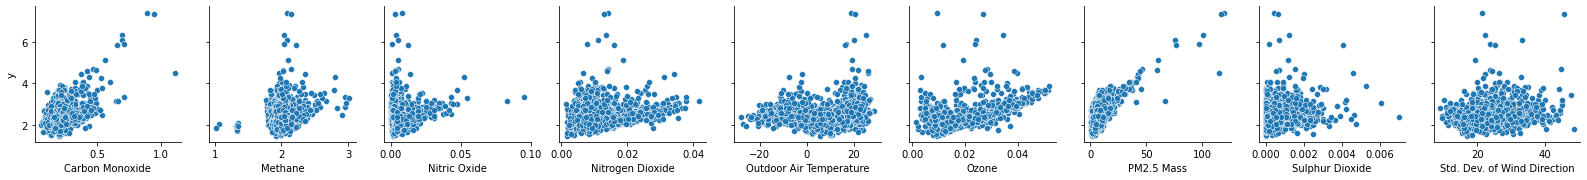

In [54]:
import seaborn as sns

# Create scatterplots of each predictor against the target variable
sns.pairplot(df1, y_vars=['y'], x_vars=['Carbon Monoxide', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide',
                                      'Outdoor Air Temperature', 'Ozone', 'PM2.5 Mass', 'Sulphur Dioxide',
                                      'Std. Dev. of Wind Direction'])

# Compute correlation coefficients
corr = df1.corr()['y']
print(corr)


### Above calculation shows that PM2.5 have high correlation with AQI

## Wildfire Data:

#### EDA for wildfire Data:

In [55]:
df_wildfire=pd.read_csv('Wildfire_2015to2018.csv')
df_wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_number                   2214 non-null   object 
 1   fire_name                     135 non-null    object 
 2   fire_year                     2214 non-null   int64  
 3   assessment_datetime           2214 non-null   object 
 4   assessment_hectares           2214 non-null   float64
 5   current_size                  2214 non-null   float64
 6   size_class                    2214 non-null   object 
 7   fire_location_latitude        2214 non-null   float64
 8   fire_location_longitude       2214 non-null   float64
 9   fire_origin                   2214 non-null   object 
 10  general_cause_desc            2214 non-null   object 
 11  fire_start_date               2214 non-null   object 
 12  det_agent_type                2214 non-null   object 
 13  dis

In [56]:
df_wildfire.sample(5)

,fire_number,fire_name,fire_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,weather_conditions_over_fire,fuel_type,other_fuel_type,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
1296,CWF225,NaN,2017,2017/8/10 14:22,0.01,0.01,A,50.584533,-114.794550,Provincial Park,...,CB Wet,C3,NaN,0.01,2017/8/10 16:35,0.01,NaN,NaN,2017/8/11 15:20,0.01
1510,MWF058,NaN,2017,2017/7/27 18:49,0.01,0.01,A,56.505133,-112.629167,Provincial Land,...,CB Wet,C2,NaN,0.01,2017/7/27 19:35,0.01,NaN,NaN,2017/7/27 20:54,0.01
1679,SWF103,NaN,2017,2017/8/9 21:00,0.01,0.01,A,56.929267,-115.692867,Provincial Land,...,Clear,M2,NaN,0.01,2017/8/10 19:00,0.01,NaN,NaN,2017/8/10 19:15,0.01
1652,SWF072,NaN,2017,2017/7/15 13:44,0.50,0.80,B,55.921567,-114.901333,Provincial Land,...,Clear,M1,NaN,0.50,2017/7/15 14:25,0.50,NaN,NaN,2017/7/16 12:00,0.80
227,HWF290,NaN,2015,2015/7/24 17:21,0.10,0.10,A,57.622750,-115.691333,Provincial Land,...,Cloudy,C2,NaN,0.10,2015/7/24 17:21,0.10,NaN,NaN,2015/7/24 19:38,0.10


In [57]:

df_wildfire["assessment_datetime"] = df_wildfire["assessment_datetime"].astype('datetime64[ns]')

In [58]:
import datetime as dt

In [59]:
df_wildfire['assessment_datetime'] = pd.to_datetime(df_wildfire['assessment_datetime']).dt.strftime('%Y-%m-%d')

In [60]:
df_wildfire.sample(5)

,fire_number,fire_name,fire_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,weather_conditions_over_fire,fuel_type,other_fuel_type,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
1334,GWF026,NaN,2017,2017-07-08,0.01,0.01,A,54.650733,-117.662700,Provincial Land,...,Clear,M2,NaN,0.01,2017/7/8 15:16,0.01,NaN,NaN,2017/7/8 16:30,0.01
995,MWF032,NaN,2016,2016-06-22,10.00,27.30,C,57.266514,-112.635463,Provincial Land,...,Clear,C2,NaN,20.00,2016/6/24 16:40,20.00,NaN,NaN,2016/6/26 18:56,27.30
1384,HWF161,NaN,2017,2017-06-25,1.00,0.40,B,58.924583,-119.866450,Provincial Land,...,CB Dry,C2,NaN,1.00,2017/6/26 13:10,0.40,NaN,NaN,2017/6/26 16:01,0.40
1010,MWF047,NaN,2016,2016-06-23,0.01,0.01,A,56.463100,-112.489933,Provincial Land,...,Cloudy,C2,NaN,0.01,2016/6/23 15:15,0.01,NaN,NaN,2016/6/23 15:30,0.01
322,MWF034,NaN,2015,2015-06-06,0.01,0.01,A,56.890267,-112.846283,Provincial Land,...,Cloudy,C2,NaN,0.01,2015/6/6 13:52,0.01,NaN,NaN,2015/6/6 14:20,0.01


In [61]:
df_wildfire.to_excel('wildfire_Data.xlsx', index=False)

In [62]:
# Load the dataset into a DataFrame
df1 = pd.read_csv('Final_Data.csv')

# Convert the date column to datetime format
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

# Filter the DataFrame to include only the rows with the year 2018
df1 = df1.loc[df1['Date/Time'].dt.year != 2018]


# Save the updated dataset to a new CSV file
df1.to_csv('updated_dataset.csv', index=False)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1095
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date/Time                    1096 non-null   datetime64[ns]
 1   Air Quality Index            1096 non-null   float64       
 2   Carbon Monoxide              1096 non-null   float64       
 3   Hydrogen Sulphide            1089 non-null   float64       
 4   Methane                      1094 non-null   float64       
 5   Nitric Oxide                 1096 non-null   float64       
 6   Nitrogen Dioxide             1096 non-null   float64       
 7   Non-methane Hydrocarbons     1090 non-null   float64       
 8   Outdoor Air Temperature      1096 non-null   float64       
 9   Ozone                        1096 non-null   float64       
 10  PM10 Mass                    412 non-null    float64       
 11  PM2.5 Mass                   1096 non-null 

### Interpreting AQI for common knowlege as  'Good', 'Moderate' or 'Risk':

The follwoing code defines a function air_quality_color() that takes an air quality index (AQI) value as input and returns a string indicating the air quality level based on the given AQI value. The function assumes the AQI value is on a scale of 0 to 10.

If the AQI value is less than or equal to 3, the function returns "Good". If the AQI value is less than or equal to 7, the function returns "Moderate". Otherwise, the function returns "Risk".

This function is useful for categorizing air quality levels based on AQI values and can be used in various air quality monitoring and reporting applications.

In [64]:
def air_quality_color(aqi):
    """
    Returns a string indicating the air quality level based on the given AQI value.
    Assumes the AQI value is on a scale of 0 to 10.
    """
    if aqi <= 3:
        return "Good"
    elif aqi <= 7:
        return "Moderate"
    else:
        return "Risk"